# Use decision trees to prepare a model on fraud data, 

treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv(r"D:\Assignments\assignment 14 - Decision trees\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [2]:
data.shape

(600, 6)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [6]:
x=data.drop(['Taxable.Income'],axis=1)
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [7]:
from sklearn import preprocessing  #transformation of string-data type into numeric
label_encoder = preprocessing.LabelEncoder()

In [8]:
x['Undergrad'] = label_encoder.fit_transform(x['Undergrad'])
x['Marital.Status'] = label_encoder.fit_transform(x['Marital.Status'])
x['Urban'] = label_encoder.fit_transform(x['Urban'])
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [9]:
y = data[['Taxable.Income']]
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [10]:
#creating new column "tax" from "taxable.income" 
import warnings
warnings.filterwarnings('ignore')
y['Tax']=['not ok' if x<=30000 else 'ok' for x in y['Taxable.Income']]
y= y.drop(['Taxable.Income'],axis=1)
y

,Tax
0,ok
1,ok
2,ok
3,ok
4,ok
...,...
595,ok
596,ok
597,ok
598,ok


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [20]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

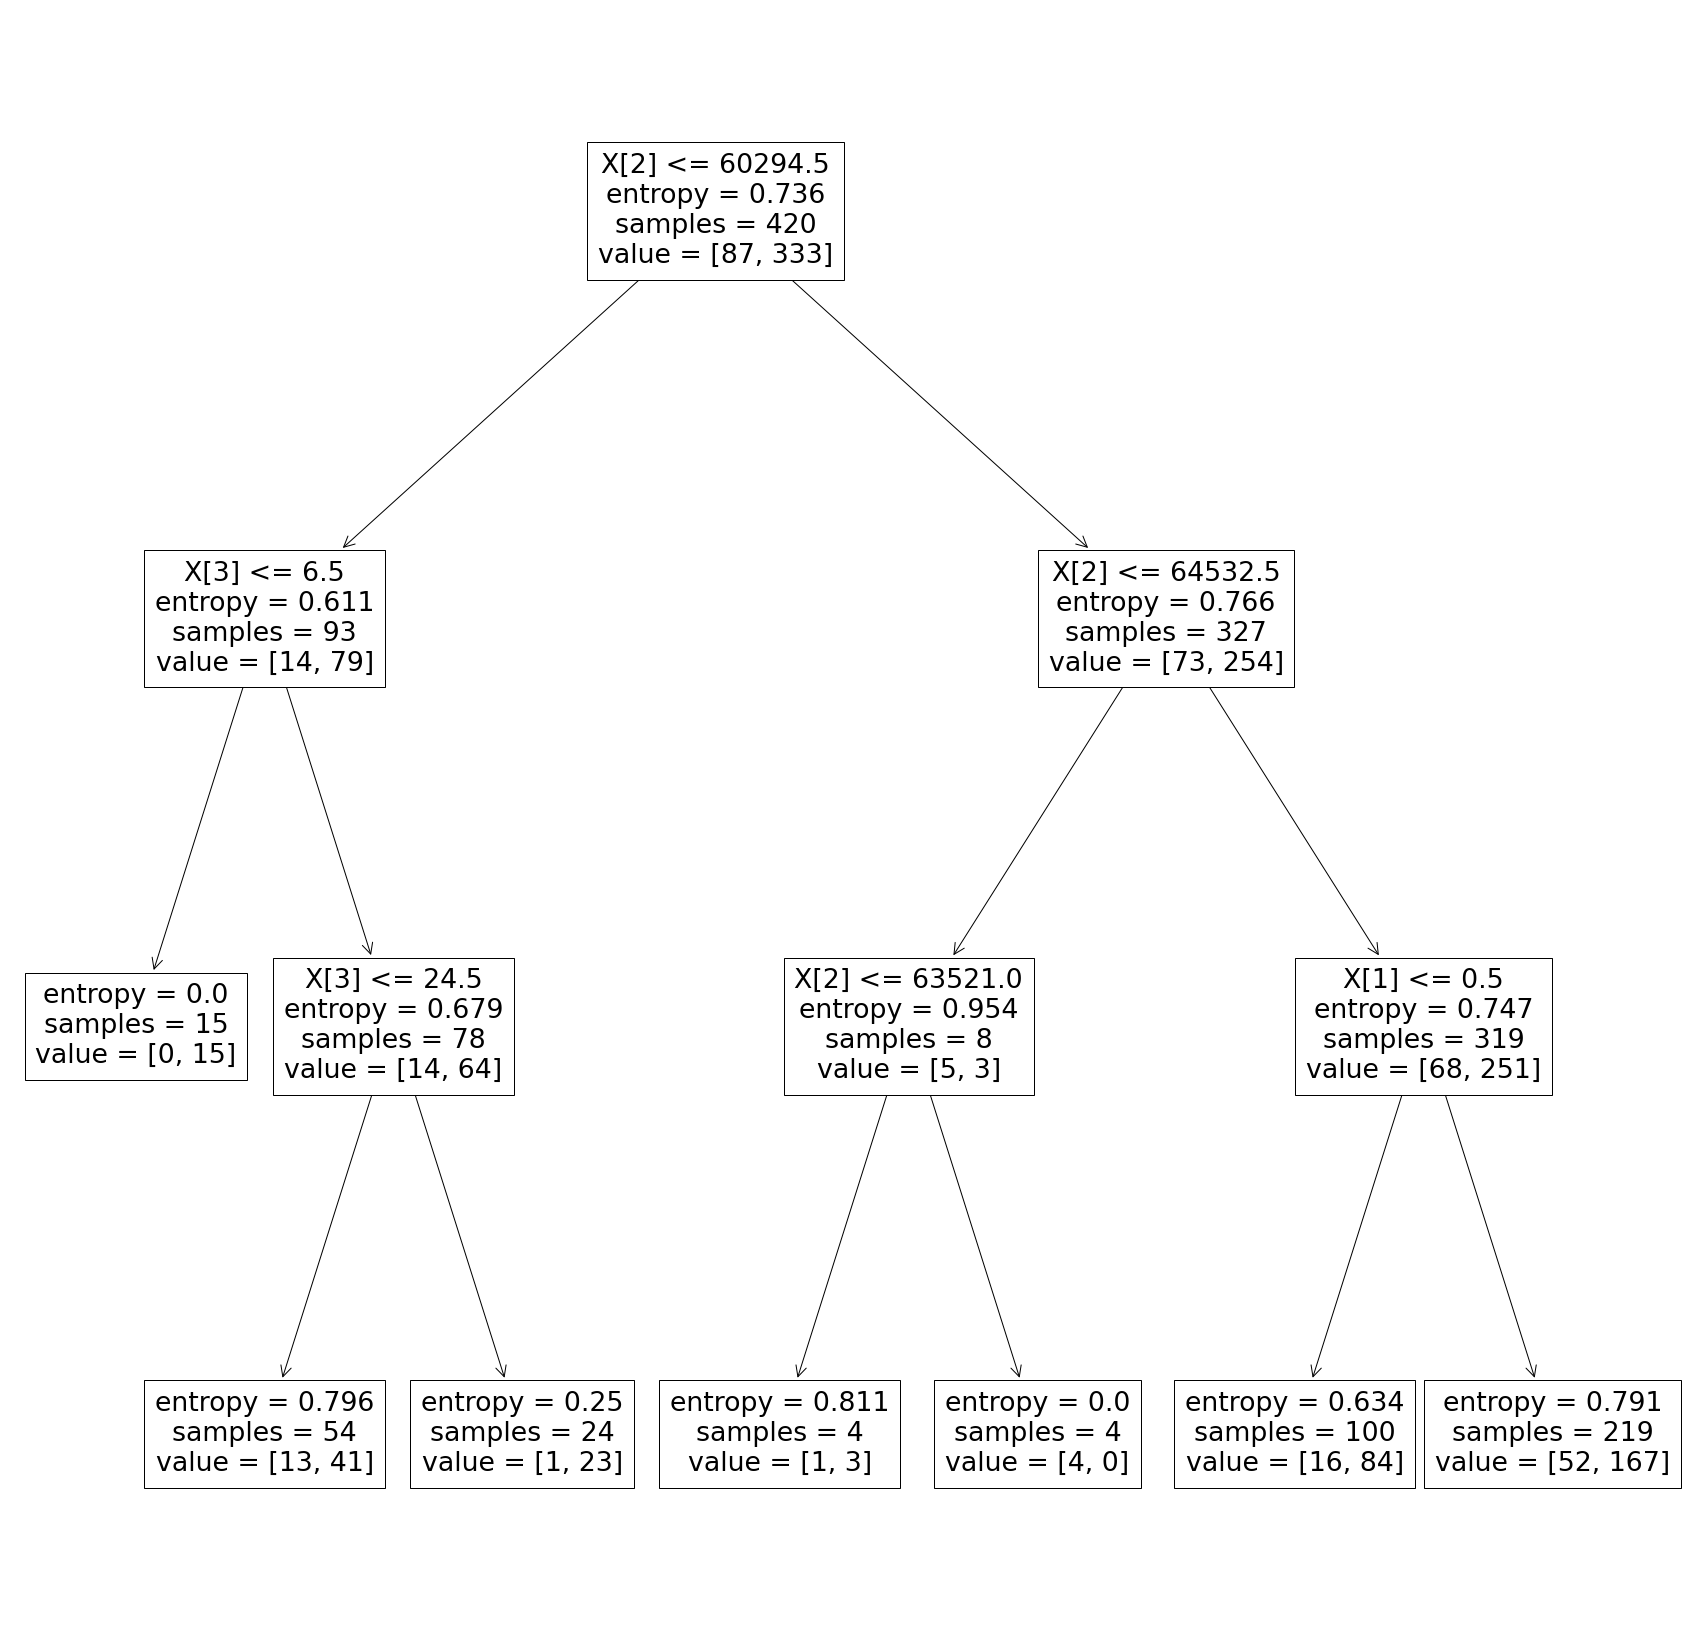

In [21]:
plt.figure(figsize=(30,30))
tree.plot_tree(model);

In [22]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good','risky']

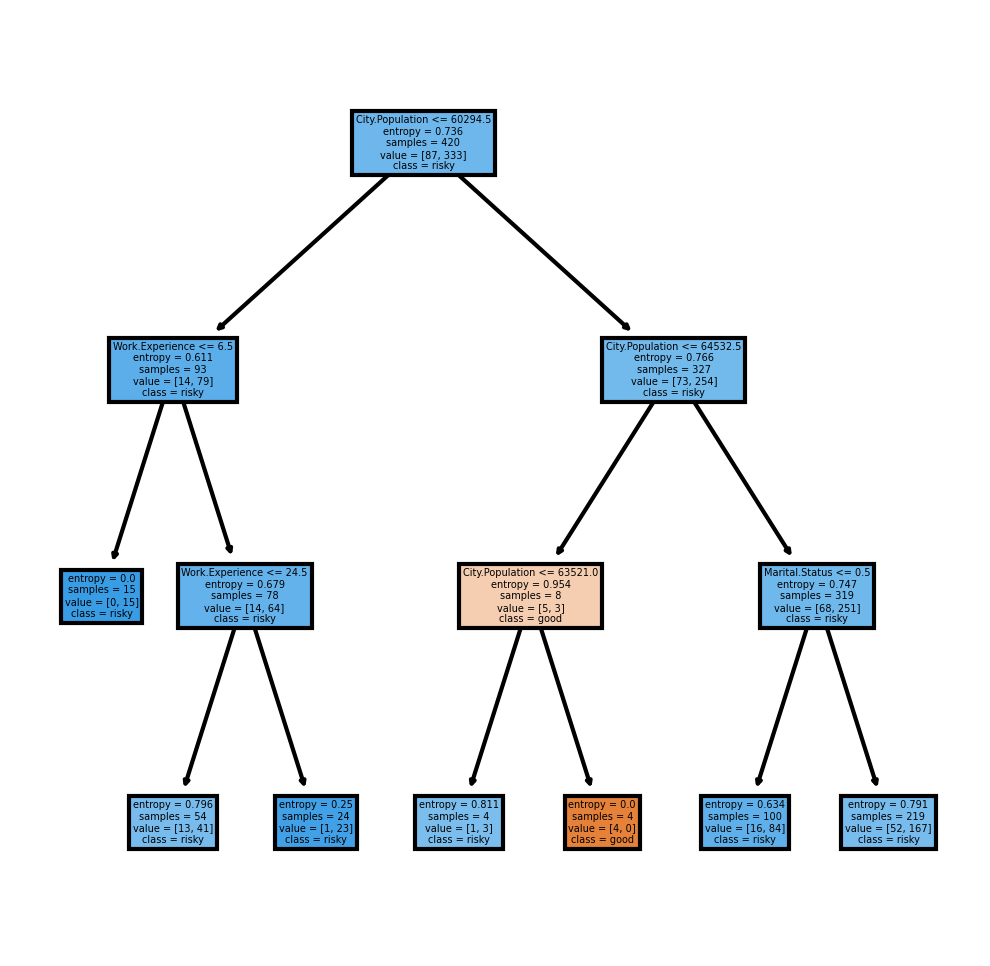

In [23]:
fig,axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);

In [24]:
predict = model.predict(x_test)
predict

array(['ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok',
       'not ok', 'ok', 'ok', 'ok', 'ok', 'ok', 'ok'

In [25]:
pd.Series(predict).value_counts()

ok        179
not ok      1
dtype: int64

In [26]:
from sklearn.metrics import classification_report
model.score(x_test,y_test)

0.7888888888888889